In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error

path_to_csv = "Video_Games_Sales_as_at_22_Dec_2016.csv"
df_vg_sales = pd.read_csv(path_to_csv)

**Let's have a look at the dataset**

In [2]:
df_vg_sales.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


Create a weighted score:

```
user_score(0-10) * user_count
            +
critic_score(0-100)/10 * critic_count

/ (user_count + critic_count)
```



In [3]:
df_vg_sales["User_Score"] = df_vg_sales["User_Score"].replace("tbd", np.nan).astype(float)

df_vg_sales["Weighted_Critic_Score"] = (df_vg_sales["User_Score"] * df_vg_sales["User_Count"] +
        df_vg_sales["Critic_Score"]/10 * df_vg_sales["Critic_Count"]) / (df_vg_sales["User_Count"] + df_vg_sales["Critic_Count"])
df_vg_sales.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Weighted_Critic_Score
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,7.945308
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.290665


**Add years since release**

In [4]:
current_year = 2016
df_vg_sales['Years_Since_Release'] = current_year - df_vg_sales['Year_of_Release']
df_vg_sales.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Weighted_Critic_Score,Years_Since_Release
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,7.945308,10.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.290665,8.0


We select our features and we want to predict 'Global Sales'.
**Drop 'NA' Values in the respective columns**

In [5]:
feature_columns = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Weighted_Critic_Score', 'Years_Since_Release', 'Rating', 'Developer', 'Platform', 'Genre']
prediction_column = ['Global_Sales']
all_columns = feature_columns + prediction_column

print("Dropping NA Values in following columns")
for column in all_columns:
  print(column)
print(f"Before dropping NA Values Video Game Sales Data has {df_vg_sales.shape[0]} entries with a total of {df_vg_sales.shape[1]} columns.")
df_vg_sales = df_vg_sales.dropna(subset=all_columns)
df_vg_sales.dropna()
print(f"After dropping NA Values: Video Game Sales Data has {df_vg_sales.shape[0]} entries with a total of {df_vg_sales.shape[1]} columns.")

Dropping NA Values in following columns
Critic_Score
Critic_Count
User_Score
User_Count
Weighted_Critic_Score
Years_Since_Release
Rating
Developer
Platform
Genre
Global_Sales
Before dropping NA Values Video Game Sales Data has 16719 entries with a total of 18 columns.
After dropping NA Values: Video Game Sales Data has 6826 entries with a total of 18 columns.


In [6]:
df_vg_sales.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Weighted_Critic_Score,Years_Since_Release
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,7.945308,10.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.290665,8.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,8.000000,7.0


Convert caterogical values into numbers/integers

PS3 -> 0
Wii -> 1
.
.
.



In [7]:
label_encoder = LabelEncoder()
for column in feature_columns:
  try:
    int(df_vg_sales.loc[0,column])
  except: # if it isn't a number -> label encoding
      df_vg_sales.loc[:,column] = label_encoder.fit_transform(df_vg_sales[column])

df_vg_sales[all_columns].head(3)

,Critic_Score,Critic_Count,User_Score,User_Count,Weighted_Critic_Score,Years_Since_Release,Rating,Developer,Platform,Genre,Global_Sales
0,76.0,51.0,8.0,322.0,7.945308,10.0,1,771,12,10,82.53
2,82.0,73.0,8.3,709.0,8.290665,8.0,1,771,12,6,35.52
3,80.0,73.0,8.0,192.0,8.000000,7.0,1,771,12,10,32.77


Let's generate new features from existing ones

**Global average sales per genre**

In [8]:
df_vg_sales_train_split, df_vg_sales_test_split = train_test_split(df_vg_sales, test_size=0.2, random_state=42)

genre_sales_avg_from_train = df_vg_sales_train_split.groupby('Genre')['Global_Sales'].mean()

feature_columns.append('Genre_Avg_Global_Sales')
all_columns = feature_columns + prediction_column

df_vg_sales['Genre_Avg_Global_Sales'] = df_vg_sales['Genre'].apply(lambda x: genre_sales_avg_from_train[x]) #

In [9]:
developer_avg_weighted_score_from_train = df_vg_sales_train_split.groupby('Developer')['Weighted_Critic_Score'].mean()

feature_columns.append('Developer_avg_weighted_score')
all_columns = feature_columns + prediction_column

df_vg_sales['Developer_avg_weighted_score'] = df_vg_sales['Developer'].apply(
    lambda x: developer_avg_weighted_score_from_train.get(x, 0)
)

In [10]:
genre_avg_weighted_score_from_train = df_vg_sales_train_split.groupby('Genre')['Weighted_Critic_Score'].mean()

feature_columns.append('Genre_avg_weighted_score')
all_columns = feature_columns + prediction_column

df_vg_sales['Genre_avg_weighted_score'] = df_vg_sales['Developer'].apply(
    lambda x: developer_avg_weighted_score_from_train.get(x, 0)
)

weighted sales per genre (only used training dataset)

The weighted sales per genre feature quantifies the total global sales of a genre by summing each game's sales, where each game's contribution is weighted by its sales in specific regions relative to its global sales. This feature is calculated using the following steps:

In [11]:
# Define your function to generate normalized features
def generate_normalized_features(df, region_proportions):
    # Aggregate sales by genre
    genre_sales = df.groupby('Genre').agg(
        NA_Sales=('NA_Sales', 'sum'),
        EU_Sales=('EU_Sales', 'sum'),
        JP_Sales=('JP_Sales', 'sum'),
        Other_Sales=('Other_Sales', 'sum'),
        Global_Sales=('Global_Sales', 'sum')
    ).reset_index()
    
    # Weighted sales by multiplying the sales by the proportions
    genre_sales['NA_Weighted'] = genre_sales['NA_Sales'] * region_proportions['NA_Proportion']
    genre_sales['EU_Weighted'] = genre_sales['EU_Sales'] * region_proportions['EU_Proportion']
    genre_sales['JP_Weighted'] = genre_sales['JP_Sales'] * region_proportions['JP_Proportion']
    genre_sales['Other_Weighted'] = genre_sales['Other_Sales'] * region_proportions['Other_Proportion']
    
    # Normalize the weighted sales to a 0-1 scale for each region
    genre_sales['NA_Normalized'] = (genre_sales['NA_Weighted'] - genre_sales['NA_Weighted'].min()) / (genre_sales['NA_Weighted'].max() - genre_sales['NA_Weighted'].min())
    genre_sales['EU_Normalized'] = (genre_sales['EU_Weighted'] - genre_sales['EU_Weighted'].min()) / (genre_sales['EU_Weighted'].max() - genre_sales['EU_Weighted'].min())
    genre_sales['JP_Normalized'] = (genre_sales['JP_Weighted'] - genre_sales['JP_Weighted'].min()) / (genre_sales['JP_Weighted'].max() - genre_sales['JP_Weighted'].min())
    genre_sales['Other_Normalized'] = (genre_sales['Other_Weighted'] - genre_sales['Other_Weighted'].min()) / (genre_sales['Other_Weighted'].max() - genre_sales['Other_Weighted'].min())
    
    # Rename columns to match the required names
    genre_sales = genre_sales.rename(columns={
        'NA_Normalized': 'weighted_NA_Sales_of_genre',
        'EU_Normalized': 'weighted_EU_Sales_of_genre',
        'JP_Normalized': 'weighted_JP_Sales_of_genre',
        'Other_Normalized': 'weighted_Other_Sales_of_genre'
    })
    
    return genre_sales

# Use training data to determine region proportions
train_genre_sales = df_vg_sales_train_split.groupby('Genre').agg(
    NA_Sales=('NA_Sales', 'sum'),
    EU_Sales=('EU_Sales', 'sum'),
    JP_Sales=('JP_Sales', 'sum'),
    Other_Sales=('Other_Sales', 'sum'),
    Global_Sales=('Global_Sales', 'sum')
).reset_index()

# Calculate the proportion of global sales from each region using training data
global_sales_total = train_genre_sales['Global_Sales'].sum()
region_proportions = {
    'NA_Proportion': train_genre_sales['NA_Sales'].sum() / global_sales_total,
    'EU_Proportion': train_genre_sales['EU_Sales'].sum() / global_sales_total,
    'JP_Proportion': train_genre_sales['JP_Sales'].sum() / global_sales_total,
    'Other_Proportion': train_genre_sales['Other_Sales'].sum() / global_sales_total
}

# Generate normalized features for training data
train_features = generate_normalized_features(df_vg_sales_train_split, region_proportions)

# Generate normalized features for test data
test_features = generate_normalized_features(df_vg_sales_test_split, region_proportions)

# Merge the normalized features back into the original df_vg_sales DataFrame
df_vg_sales = df_vg_sales.merge(train_features[['Genre', 'weighted_NA_Sales_of_genre', 'weighted_EU_Sales_of_genre', 'weighted_JP_Sales_of_genre', 'weighted_Other_Sales_of_genre']],
                          on='Genre', how='left')

feature_columns = feature_columns + ['weighted_NA_Sales_of_genre', 'weighted_EU_Sales_of_genre', 'weighted_JP_Sales_of_genre', 'weighted_Other_Sales_of_genre']
all_columns = feature_columns + prediction_column

# Display the updated df_vg_sales DataFrame
df_vg_sales.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Rating,Weighted_Critic_Score,Years_Since_Release,Genre_Avg_Global_Sales,Developer_avg_weighted_score,Genre_avg_weighted_score,weighted_NA_Sales_of_genre,weighted_EU_Sales_of_genre,weighted_JP_Sales_of_genre,weighted_Other_Sales_of_genre
0,Wii Sports,12,2006.0,10,Nintendo,41.36,28.96,3.77,8.45,82.53,...,1,7.945308,10.0,0.903342,7.992483,7.992483,0.821585,0.647123,0.264956,0.632900
1,Mario Kart Wii,12,2008.0,6,Nintendo,15.68,12.76,3.79,3.29,35.52,...,1,8.290665,8.0,0.841457,7.992483,7.992483,0.362139,0.419492,0.182863,0.389817
2,Wii Sports Resort,12,2009.0,10,Nintendo,15.61,10.93,3.28,2.95,32.77,...,1,8.000000,7.0,0.903342,7.992483,7.992483,0.821585,0.647123,0.264956,0.632900



The proportion of published games per developer to overall published games


In [12]:
# # Assuming df_vg_sales_train_split is your training dataset
# def calculate_developer_proportion(df):
#     # Count the number of games per developer
#     developer_counts = df.groupby('Developer').size().reset_index(name='Games_Published')
# 
#     # Calculate the total number of games published
#     total_games = developer_counts['Games_Published'].sum()
# 
#     # Compute the proportion of games per developer
#     developer_counts['Developer_Proportion'] = developer_counts['Games_Published'] / total_games
# 
#     return developer_counts
# 
# # Calculate developer proportions using the training dataset
# developer_proportions_train = calculate_developer_proportion(df_vg_sales_train_split)
# 
# # Merge the developer proportions back into the training dataset
# df_vg_sales = df_vg_sales.merge(developer_proportions_train[['Developer', 'Developer_Proportion']], 
#                           on='Developer', how='left')
# 
# feature_columns.append('Developer_Proportion')
# all_columns = feature_columns + prediction_column
# 
# df_vg_sales.head(10)


Number of games per genre published in the same year are calculated to be used as a feature.

In [13]:
# def calculate_games_per_genre_per_year(df):
#     # Count the number of games per genre per year
#     genre_year_counts = df.groupby(['Genre', 'Year_of_Release']).size().reset_index(name='Games_Per_Genre_Per_Year')
#     return genre_year_counts
# 
# # Calculate the number of games per genre per year using training data
# train_genre_year_counts = calculate_games_per_genre_per_year(df_vg_sales_train_split)
# 
# # Calculate the number of games per genre per year using the entire dataset for consistency
# full_genre_year_counts = calculate_games_per_genre_per_year(df_vg_sales)
# 
# # Merge the games per genre per year back into the full dataset
# df_vg_sales = df_vg_sales.merge(train_genre_year_counts[['Genre', 'Year_of_Release', 'Games_Per_Genre_Per_Year']], 
#                                 on=['Genre', 'Year_of_Release'], how='left')
# 
# feature_columns.append('Games_Per_Genre_Per_Year')
# all_columns = feature_columns + prediction_column
# 
# df_vg_sales.head(10)

Select features and prediction columns

In [14]:
features = df_vg_sales[feature_columns]
target = df_vg_sales[prediction_column]

In [15]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target.iloc[:,0], test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
total_nan_values = np.isnan(X_test).sum()
print(f'Total NaN values in array: {total_nan_values}')

print(len(X_test))

#X_test = np.nan_to_num(X_test, nan=0)

Total NaN values in array: 0
1366


In [18]:
df_vg_sales[all_columns].head(3)

,Critic_Score,Critic_Count,User_Score,User_Count,Weighted_Critic_Score,Years_Since_Release,Rating,Developer,Platform,Genre,Genre_Avg_Global_Sales,Developer_avg_weighted_score,Genre_avg_weighted_score,weighted_NA_Sales_of_genre,weighted_EU_Sales_of_genre,weighted_JP_Sales_of_genre,weighted_Other_Sales_of_genre,Global_Sales
0,76.0,51.0,8.0,322.0,7.945308,10.0,1,771,12,10,0.903342,7.992483,7.992483,0.821585,0.647123,0.264956,0.632900,82.53
1,82.0,73.0,8.3,709.0,8.290665,8.0,1,771,12,6,0.841457,7.992483,7.992483,0.362139,0.419492,0.182863,0.389817,35.52
2,80.0,73.0,8.0,192.0,8.000000,7.0,1,771,12,10,0.903342,7.992483,7.992483,0.821585,0.647123,0.264956,0.632900,32.77


In [19]:
print(X_train[0:3])

[[-7.43584008e-01  1.10133142e+00  4.19762184e-01  1.16236521e-01
   3.43049895e-01 -1.44703689e-01 -7.12918762e-01  1.00116501e+00
   1.25984713e+00 -2.91674383e-01  9.98945740e-01  3.96721773e-01
   3.96721773e-01 -7.66814294e-01 -7.66460071e-01 -1.09578011e-01
  -8.40860141e-01]
 [ 1.06809323e+00  8.93144548e-01  1.11685493e+00  1.88117027e-03
   1.31029414e+00 -6.21374666e-01 -7.12918762e-01  8.84426483e-01
  -1.33649797e-01 -2.91674383e-01  9.98945740e-01 -4.25627466e-01
  -4.25627466e-01 -7.66814294e-01 -7.66460071e-01 -1.09578011e-01
  -8.40860141e-01]
 [-8.88518187e-01 -3.03929952e-01  5.59180733e-01 -2.35492816e-01
   6.43712914e-02  5.70302776e-01 -7.12918762e-01  1.05953427e+00
  -3.65899284e-01  4.94766175e-01 -4.50925617e-01  3.45423998e-01
   3.45423998e-01 -6.81317098e-01 -7.50617032e-01  2.17504305e+00
  -7.40719281e-01]]


In [20]:
y_train.head(3)

1373    0.95
1870    0.68
2118    0.58
Name: Global_Sales, dtype: float64

**Random Forest Regression**

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, criterion='squared_error')
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
mse_new = mean_squared_error(y_test, y_pred)
rmse_new = np.sqrt(mse_new)
r2_new = r2_score(y_test, y_pred)
mae_new = mean_absolute_error(y_test, y_pred)

print("Scores with additionally generated features")
print(f"Root-Mean-Square-Error (RMSE): {rmse_new:.3f}")
print(f"Coefficient of determination (r²): {r2_new:.3f}")
print(f"Mean Absolute Error (MAE): {mae_new:.3f}")

Scores with additionally generated features
Root-Mean-Square-Error (RMSE): 1.147
Coefficient of determination (r²): 0.516
Mean Absolute Error (MAE): 0.516


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(alpha=0.4, n_estimators=100, max_depth=2)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
mse_new = mean_squared_error(y_test, y_pred)
rmse_new = np.sqrt(mse_new)
r2_new = r2_score(y_test, y_pred)
mae_new = mean_absolute_error(y_test, y_pred)

print("Scores with additionally generated features")
print(f"Root-Mean-Square-Error (RMSE): {rmse_new:.3f}")
print(f"Coefficient of determination (r²): {r2_new:.3f}")
print(f"Mean Absolute Error (MAE): {mae_new:.3f}")

Scores with additionally generated features
Root-Mean-Square-Error (RMSE): 1.243
Coefficient of determination (r²): 0.432
Mean Absolute Error (MAE): 0.551


In [23]:
import matplotlib.pyplot as plt
def plot_actual_vs_predicted(y_test, y_pred, y_x_max= None):
  # Scatter plot to visualize predicted vs actual sales
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.6)
  if y_x_max:
    plt.xlim(0, y_x_max)
    plt.ylim(0, y_x_max)
  plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red', label='Perfect Prediction Line')

  plt.xlabel('Actual Sales (Millions of Units)')
  plt.ylabel('Predicted Sales (Millions of Units)')
  plt.title('Actual vs. Predicted Global Sales')
  plt.legend()
  plt.grid(True)
  plt.show()

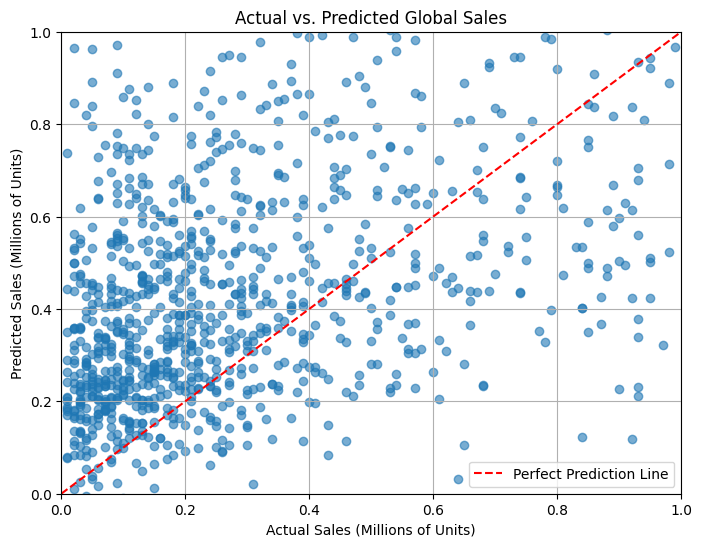

In [24]:
plot_actual_vs_predicted(y_pred=y_pred, y_test=y_test, y_x_max= 1)

In [25]:
to_edit = ['Developer', 'Rating' , 'Platform', 'Genre']

from xgboost import XGBRegressor
xg_model = XGBRegressor(n_estimators=100, max_depth=40, learning_rate= 0.001, enable_categorical = True)
xg_model.fit(X_train, y_train)
# Predictions and evaluation
y_pred_xg = xg_model.predict(X_test)
mse_xg = mean_squared_error(y_test, y_pred_xg)
rmse_xg = np.sqrt(mse_xg)
r2_xg = r2_score(y_test, y_pred_xg)
mae_xg = mean_absolute_error(y_test, y_pred_xg)

print("Scores with additionally generated features")
print(f"Root-Mean-Square-Error (RMSE): {rmse_xg:.3f}")
print(f"Coefficient of determination (r²): {r2_xg:.3f}")
print(f"Mean Absolute Error (MAE): {mae_xg:.3f}")

Scores with additionally generated features
Root-Mean-Square-Error (RMSE): 1.578
Coefficient of determination (r²): 0.085
Mean Absolute Error (MAE): 0.775


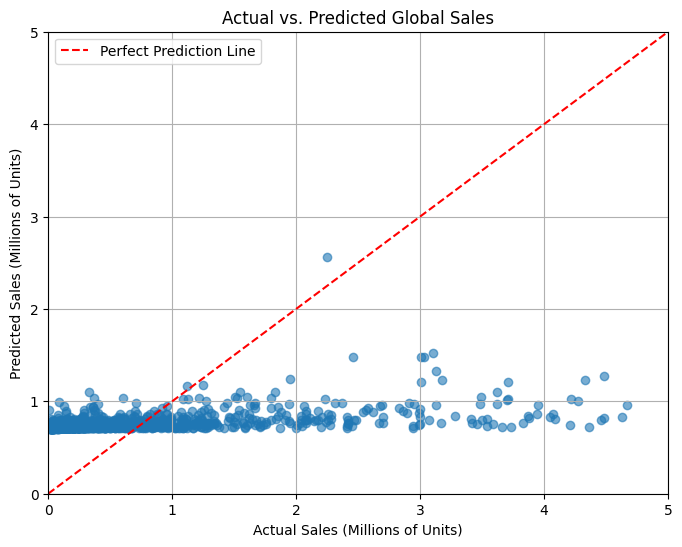

In [26]:
plot_actual_vs_predicted(y_pred=y_pred_xg, y_test=y_test, y_x_max= 5)

In [31]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
from sklearn.metrics import roc_auc_score
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

ebm = ExplainableBoostingRegressor(feature_columns, interactions=3)
ebm.fit(X_train, y_train)

Hallo


In [32]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

In [29]:
ebm_local = ebm.explain_local(X_test[:5], y_test[:5], name='EBM')
show(ebm_local, 0)

In [30]:
from interpret.perf import RegressionPerf
ebm_perf = RegressionPerf(ebm, feature_columns).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)